## Løsning av differensiallikninger, Nikolai G. Borbe

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### a) Vi løser det analytisk med Jacobi metoden

In [2]:
#parametere
width = 2
height = 2
d = 0.5

ratio = d/width

grid_size = 201
V_l = -1
V_r = 1

left_index = int(int(grid_size/2) - int(ratio*100))
right_index = int(int(grid_size/2) + int(ratio*100))

V_plate_bot = int(((grid_size)/4))
V_plate_top = int(3 * ((grid_size)/4))


grid = np.zeros((grid_size, grid_size))

# platene lages
grid[V_plate_bot:V_plate_top, left_index] = 1
grid[V_plate_bot:V_plate_top, right_index] = -1
grid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(201, 201))

In [3]:
rand = np.copy(grid)

# punkter å ikke regne et laplace steg
inf = float("inf")
rand[0, :] = inf
rand[-1, :] = inf
rand[:, 0] = inf
rand[:, -1] = inf
rand[V_plate_bot:V_plate_top, left_index] = inf
rand[V_plate_bot:V_plate_top, right_index] = inf
rand

array([[inf, inf, inf, ..., inf, inf, inf],
       [inf,  0.,  0., ...,  0.,  0., inf],
       [inf,  0.,  0., ...,  0.,  0., inf],
       ...,
       [inf,  0.,  0., ...,  0.,  0., inf],
       [inf,  0.,  0., ...,  0.,  0., inf],
       [inf, inf, inf, ..., inf, inf, inf]], shape=(201, 201))

In [4]:
V = grid.copy()

for _ in range(50):
    for r in range(1, grid_size - 1):
        for c in range(1, grid_size - 1):
            if rand[r, c] == float("inf"): continue
    
            V[r, c] = 0.25 * (grid[r+1, c] + grid[r-1, c] + grid[r, c+1] + grid[r, c-1])      
    grid = V.copy()

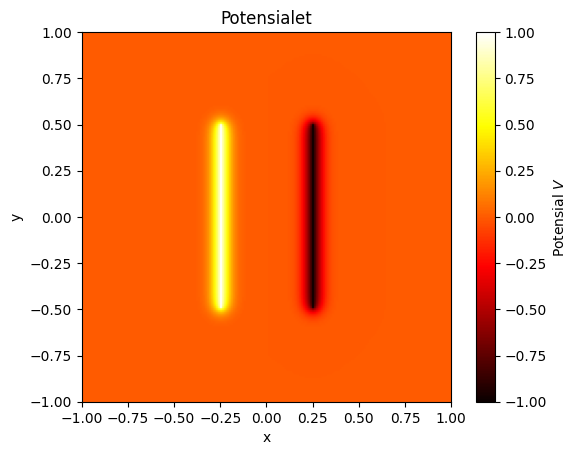

In [5]:
plt.imshow(V, extent=[-1, 1, -1, 1], cmap='hot')
plt.colorbar(label='Potensial $V$')
plt.title('Potensialet')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Figuren viser det elektriske potensialet mellom to ladede plater $V_1 = 1$ (venstre) og $V_2 = -1$ (høyre)

### B) 
Vi vet at
$$\vec E = -\nabla  V$$
da har vi

In [6]:
x, y = np.linspace(-1, 1, grid_size), np.linspace(-1, 1, grid_size)

dx = x[1] - x[0]
dy = y[1] - y[0]

X, Y = np.meshgrid(x, y)

grad_y, grad_x = np.gradient(V, dy, dx)

Ex = -grad_x
Ey = -grad_y
len(y)

201

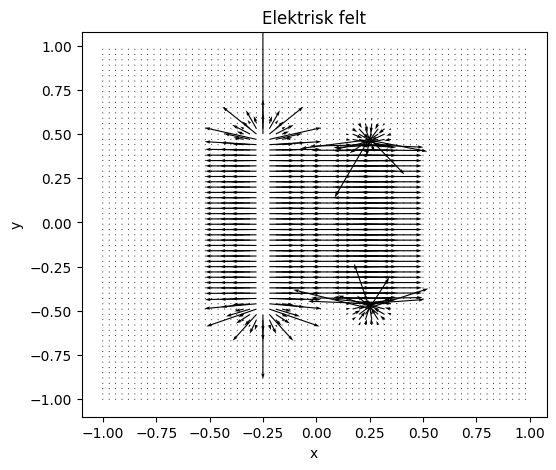

In [7]:
skip = 3
plt.figure(figsize=(6, 5))
plt.quiver(X[::skip, ::skip], Y[::skip, ::skip], Ex[::skip, ::skip], Ey[::skip, ::skip], scale=120)
plt.title("Elektrisk felt")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Figuren viser de elektriske feltlinjene mellom de samme platene fra oppgave a.
notat: jeg greier ikke å finne ut av hvorfor pilene langs midten av den høre platen peker ut og ikke inn :(

### c) Plott den elektriske feltstyrken i punktet (0, 0.6) som funksjon av plateseparasjon d.
burde ha brukt funksjoner :(

In [8]:
dx = width / (grid_size - 1)
dy = height / (grid_size - 1)
x = np.linspace(-width/2, width/2, grid_size)
y = np.linspace(-height/2, height/2, grid_size)

In [9]:
def solve(d):
    x_min = -width / 2 
    left_x = -d / 2   
    right_x = d / 2   
    left_index = int((left_x - x_min) / dx)
    right_index = int((right_x - x_min) / dx)

    grid = np.zeros((grid_size, grid_size))
    
    grid[V_plate_bot:V_plate_top, left_index] = V_l 
    grid[V_plate_bot:V_plate_top, right_index] = V_r 

    fixed = np.zeros((grid_size, grid_size), dtype=bool)
    fixed[0, :] = True   
    fixed[-1, :] = True 
    fixed[:, 0] = True 
    fixed[:, -1] = True
    fixed[V_plate_bot:V_plate_top, left_index] = True
    fixed[V_plate_bot:V_plate_top, right_index] = True

    V = grid.copy()
    
    for _ in range(50):
        for r in range(1, grid_size - 1):
            for c in range(1, grid_size - 1):
                if fixed[r, c]: continue
                V[r, c] = 0.25 * (grid[r+1, c] + grid[r-1, c] + grid[r, c+1] + grid[r, c-1])
        grid = V.copy()
    return V

In [10]:
d_values = np.linspace(0.1, 0.8, 20)
E_magnitudes = []

for d in d_values:
    V = solve(d)

    grad_y, grad_x = np.gradient(V, dy, dx)

    Ex = -grad_x
    Ey = -grad_y

    ix = np.argmin(np.abs(x - 0))
    iy = np.argmin(np.abs(y - 0.6))

    E_val = np.sqrt(Ex[iy, ix]**2 + Ey[iy, ix]**2)
    E_magnitudes.append(E_val)
    print(f"d = {d:.2f}, E at (0,0.6) = {E_val:.4f}")

d = 0.10, E at (0,0.6) = 0.1902
d = 0.14, E at (0,0.6) = 0.1708
d = 0.17, E at (0,0.6) = 0.1084
d = 0.21, E at (0,0.6) = 0.0548
d = 0.25, E at (0,0.6) = 0.0226
d = 0.28, E at (0,0.6) = 0.0077
d = 0.32, E at (0,0.6) = 0.0021
d = 0.36, E at (0,0.6) = 0.0010
d = 0.39, E at (0,0.6) = 0.0002
d = 0.43, E at (0,0.6) = 0.0000
d = 0.47, E at (0,0.6) = 0.0000
d = 0.51, E at (0,0.6) = 0.0000
d = 0.54, E at (0,0.6) = 0.0000
d = 0.58, E at (0,0.6) = 0.0000
d = 0.62, E at (0,0.6) = 0.0000
d = 0.65, E at (0,0.6) = 0.0000
d = 0.69, E at (0,0.6) = 0.0000
d = 0.73, E at (0,0.6) = 0.0000
d = 0.76, E at (0,0.6) = 0.0000
d = 0.80, E at (0,0.6) = 0.0000


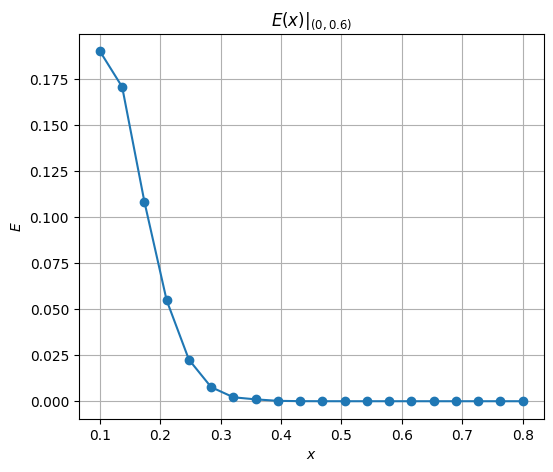

In [11]:
plt.figure(figsize=(6, 5))
plt.plot(d_values, E_magnitudes, marker='o', linestyle='-')
plt.xlabel("$x$")
plt.ylabel("$E$")
plt.title("$E(x)|_{(0, 0.6)}$")
plt.grid(True)
plt.show()

Figuren viser det elektriske feltet i punktet $x_0 = (0, 0.6)$ git en avstand mellom platene $d$.